In [1]:
import numpy as np
import matplotlib.pyplot as plt

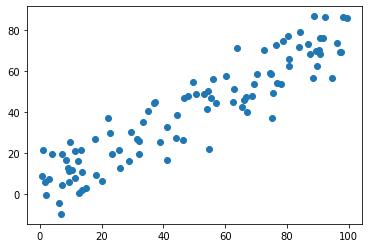

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)
plt.scatter(X[:,0], X[:,1])
plt.show()

### Demean

In [3]:
def demean(X):
    """Each feature minus its mean, therefore compute mean vertically (columnwise)"""
    return X - np.mean(X, axis=0)

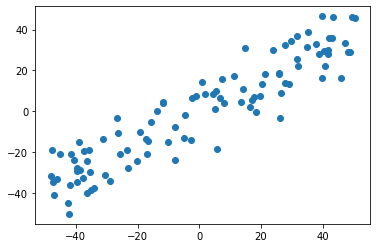

In [5]:
X_demean = demean(X)
# Move the axises to the "center"
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [6]:
# Object function
def f(w, X):
    return np.sum(X.dot(w)**2) / len(X)
    
def df_math(w, X):
    return X.T.dot(X.dot(w)) *2. / len(X)

def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # Note 1:每次都将w转为单位向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [8]:
# Note 2: initial w can't be 0
initial_w = np.random.random(X.shape[1])
eta = 0.001
# Note 3: can't use StandardScaler
gradient_ascent(df_debug, X, initial_w, eta)

array([0.77368965, 0.63356477])

In [11]:
w = gradient_ascent(df_math, X, initial_w, eta)

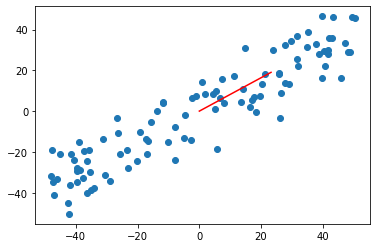

In [12]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

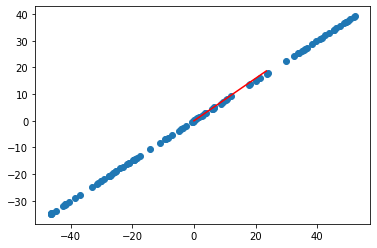

In [14]:
# Without noise (np.random.normal(0, 10., size=100)), points will completely lie on the w
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.
X2_demean = demean(X2)
w = gradient_ascent(df_math, X2, initial_w, eta)
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

## Getting first n component

In [15]:
def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df_math(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # Note 1:每次都将w转为单位向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [16]:
initial_w = np.random.random(X.shape[1])
eta = 0.001
w = first_component(X, initial_w, eta)
w

array([0.77368964, 0.63356478])

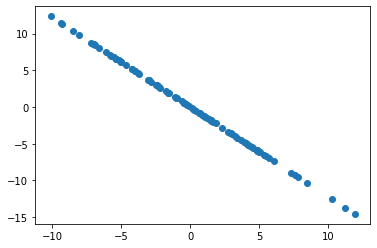

In [17]:
# Xproject = X[i].dot(w) * w
X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w
X2 = X - X.dot(w).reshape(-1, 1) * w

plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [21]:
w2 = first_component(X2, initial_w, eta)  # second component
w2

array([-0.63354606,  0.77370498])

In [23]:
# w is perpendicular to w2
w.dot(w2)

2.420271222991488e-05

In [29]:
def first_n_component(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [30]:
first_n_component(2, X)

[array([0.78252527, 0.62261882]), array([ 0.62262265, -0.78252223])]